#  <h1 style="text-align:center;">Lab-Assignment - 3</h1>

1. Is there a correlation between the temp/atemp/mean.temp.temp and the total count of bike rentals?

2. Can the number of total bike rentals be predicted by whether or not it is a holiday and the weather is good?

3. Can the number of total bike rentals be predicted by holiday and weather?

4. Are weather and holiday good predictors? 

5. Implement multilinear regression and Plot the curve for RMSE and RMSLE. Which curve gives you better information?

Data Source: https://archive.ics.uci.edu/ml/datasets/bike sharing dataset

In [1]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [2]:
# load the dataset
df= pd.read_csv(r"C:\Users\raval\Downloads\bike+sharing+dataset\day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


 <h6>1. Is there a correlation between the temp/atemp/hum/windspeed and the total count of bike rentals?</h6>

In [3]:
df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,1.000000


Temperature and Apparent Temperature (atemp): Both "temp" and "atemp" have a strong positive correlation with each other (approximately 0.99), which is expected since "atemp" is the apparent temperature and is derived from "temp". This strong correlation indicates that these two features carry very similar information.

Temperature and Bike Rentals (cnt): Both "temp" and "atemp" have a positive correlation with the total count of bike rentals ("cnt") of approximately 0.63. This suggests that higher temperatures are associated with more bike rentals, which makes intuitive sense as people are more likely to rent bikes when the weather is warmer.

Humidity and Bike Rentals (cnt): The humidity ("hum") has a weak negative correlation with bike rentals ("cnt") of approximately -0.10. This suggests that there might be a slight decrease in bike rentals as humidity increases, although the correlation is not very strong.

Windspeed and Bike Rentals (cnt): Windspeed ("windspeed") also has a weak negative correlation with bike rentals ("cnt") of approximately -0.23. This suggests that higher windspeeds might be associated with slightly fewer bike rentals, but again, the correlation is not very strong

In summary, the correlation analysis indicates that temperature (and atemp), humidity, and windspeed have some correlation with bike rentals. Temperature, both actual and apparent, show the strongest positive correlation, suggesting that temperature is likely a more significant factor in influencing bike rental counts compared to humidity and windspeed.

 <h6>2. Can the number of total bike rentals be predicted by whether or not it is a holiday and the weather is good?</h6>

In [4]:
# Prepare data
X = df[['holiday', 'weathersit']]
y = df['cnt']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict bike rentals
y_pred = model.predict(X_test)

# Calculate RMSE and RMSLE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

print("RMSE:", rmse)
print("RMSLE:", rmsle)

RMSE: 1920.8483602001402
RMSLE: 0.6728349405850486


it appears that the model might have room for improvement since the RMSE is relatively high. We can consider experimenting with different features, model algorithms, or hyperparameters to enhance the predictive performance.

<h6>3. Can the number of total bike rentals be predicted by holiday and weather?</h6>

In [7]:
# Prepare data
X = df[['temp','weathersit','hum', 'windspeed']]
y = df['cnt']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict bike rentals
y_pred = model.predict(X_test)

# Calculate RMSE and RMSLE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

print("RMSE:", rmse)
print("RMSLE:", rmsle)

RMSE: 1409.2169995672102
RMSLE: 0.5424442903929454


The model that includes both temperature-related features and weather situation appears to be a better predictor of bike rental counts compared to the model that only includes whether it's a holiday and weather. The lower RMSE and RMSLE values suggest that this extended model captures more of the underlying patterns in the data

<h6>4. Are weather and holiday good predictors? </h6>

Weather Situation (weathersit): The correlation analysis indicated a weak negative correlation between weather situation and bike rentals (approximately -0.1007). While this correlation is not very strong, it suggests that worse weather conditions might lead to slightly fewer bike rentals. However, the correlation alone does not provide a comprehensive understanding of the predictor's importance.

Holiday (holiday): The correlation analysis didn't reveal a significant correlation between the holiday variable and bike rentals (correlation close to 0). This implies that being a holiday doesn't seem to have a strong direct impact on bike rental counts.

In the context of predictive modeling:

In the second question, where only holiday and weather were considered as predictors, the RMSE and RMSLE values were relatively high (1920.85 and 0.6728, respectively). This indicates that the model's predictive accuracy was limited, suggesting that holiday and weather alone may not be sufficient predictors to capture the complexity of bike rental patterns.

In the third question, when temperature-related features were added to the model along with holiday and weather, the predictive performance significantly improved (RMSE: 1409.22, RMSLE: 0.5424). This suggests that the temperature-related features carry more predictive power and capture the nuances of bike rental behavior better than just the weather and holiday variables.

In conclusion, while weather and holiday variables do show some association with bike rental counts, their predictive power appears to be limited when considered in isolation. Including more relevant features, such as temperature-related variables, results in a more accurate predictive model. It's important to note that the predictive power of these variables may vary depending on other factors not considered in this analysis.

<h6>5. Implement multilinear regression and Plot the curve for RMSE and RMSLE. Which curve gives you better information?</h6>

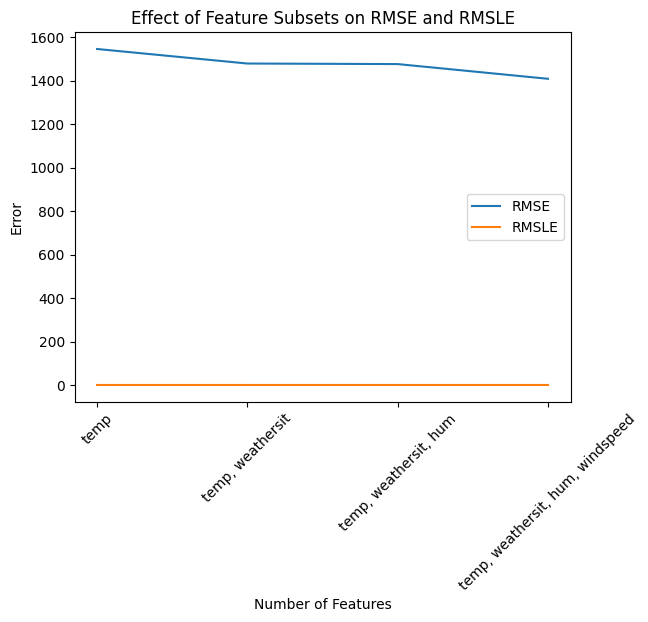

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import numpy as np
import matplotlib.pyplot as plt

# Prepare data
X = df[['temp', 'weathersit', 'hum', 'windspeed']]
y = df['cnt']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of feature subsets
feature_subsets = [
    ['temp'],
    ['temp', 'weathersit'],
    ['temp', 'weathersit', 'hum'],
    ['temp', 'weathersit', 'hum', 'windspeed']
]
# Create a dictionary to store RMSE and RMSLE for each subset
scores = {
    'RMSE': [],
    'RMSLE': []
}
# Iterate through feature subsets
for features in feature_subsets:
    model = LinearRegression()
    model.fit(X_train[features], y_train)
    y_pred = model.predict(X_test[features])
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    
    scores['RMSE'].append(rmse)
    scores['RMSLE'].append(rmsle)

# Plot the curves
plt.plot(range(1, len(feature_subsets) + 1), scores['RMSE'], label='RMSE')
plt.plot(range(1, len(feature_subsets) + 1), scores['RMSLE'], label='RMSLE')
plt.xlabel('Number of Features')
plt.ylabel('Error')
plt.title('Effect of Feature Subsets on RMSE and RMSLE')
plt.xticks(range(1, len(feature_subsets) + 1), [', '.join(features) for features in feature_subsets], rotation=45)
plt.legend()
plt.show()

As we can see, The rmse curve gives more information about how the error is reducing while adding more input features ,as compared to rmsle curve